In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data_location_01 = "./data/dolphins.csv"
df_dolphins = pd.read_csv(data_location_01)
df_dolphins.tail(25)

,time,Lizzy_angle,Perry_angle,BentHighNick_angle
9556,2012-08-15 02:30:00,NaN,NaN,NaN
9557,2012-08-15 02:45:00,NaN,NaN,276.793122
9558,2012-08-15 03:00:00,NaN,NaN,NaN
9559,2012-08-15 03:15:00,NaN,NaN,NaN
9560,2012-08-15 03:30:00,NaN,NaN,NaN
9561,2012-08-15 03:45:00,NaN,NaN,NaN
9562,2012-08-15 04:00:00,NaN,NaN,NaN
9563,2012-08-15 04:15:00,NaN,NaN,NaN
9564,2012-08-15 04:30:00,NaN,NaN,NaN
9565,2012-08-15 04:45:00,NaN,NaN,NaN


In [21]:
df_dolphins_trim = df_dolphins.dropna(subset=['Lizzy_angle', 'Perry_angle', 'BentHighNick_angle'])
df_dolphins_trim.shape

(277, 4)

In [26]:
df_dolphins_trim['time'] = pd.to_datetime(df_dolphins_trim['time'])

# Normalize time for radius (0 to 1 range)
min_time = df_dolphins_trim['time'].min()
max_time = df_dolphins_trim['time'].max()
df_dolphins_trim['radius'] = (df_dolphins_trim['time'] - min_time) / (max_time - min_time)
df_dolphins_trim['frames'] = ((df_dolphins_trim['time'] - min_time) / (max_time - min_time) * 3312).astype(int) + 7773

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_46751/2256364452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dolphins_trim['time'] = pd.to_datetime(df_dolphins_trim['time'])
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_46751/2256364452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dolphins_trim['radius'] = (df_dolphins_trim['time'] - min_time) / (max_time - min_time)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_46751/2256364452.py:7: SettingWithCopy

In [27]:
df_dolphins_trim.head()

,time,Lizzy_angle,Perry_angle,BentHighNick_angle,radius,frames
142,2012-05-09 01:00:00,291.326072,143.258934,253.487823,0.000000,7773
144,2012-05-09 01:30:00,280.295841,150.191566,265.503432,0.000308,7774
169,2012-05-09 07:45:00,324.120288,244.025653,271.749239,0.004159,7786
239,2012-05-10 01:15:00,295.842119,158.229584,295.951889,0.014941,7822
246,2012-05-10 03:00:00,331.142462,149.601281,330.501665,0.016020,7826


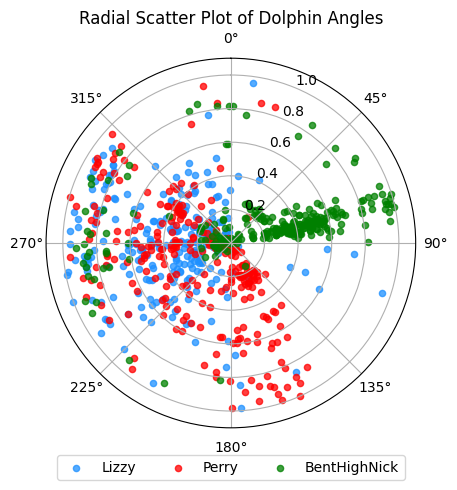

In [28]:
# Set up the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot each dolphin's data
for column, color, label in zip(['Lizzy_angle', 'Perry_angle', 'BentHighNick_angle'],
                                ['dodgerblue', 'red', 'green'],
                                ['Lizzy', 'Perry', 'BentHighNick']):
    angles = np.deg2rad(df_dolphins_trim[column].dropna())
    radii = df_dolphins_trim.loc[df_dolphins_trim[column].notna(), 'radius']
    ax.scatter(angles, radii, label=label, alpha=0.75, s=20, c=color)

# Customize the plot
ax.set_title('Radial Scatter Plot of Dolphin Angles')
ax.set_rmax(1.1)  # Set a bit more than 1 to make space for markers
ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_theta_zero_location('N')  # Set 0 degrees to be at the top
ax.set_theta_direction(-1)  # Set clockwise direction
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.16), ncol=3)
plt.savefig('./figures/dolphins_trim.png', dpi=300, bbox_inches=None, pad_inches=1.0)

# Show the plot
plt.show()

In [30]:
df_dolphins_trim.to_csv('./data/dolphins_positions_01.csv', index = True)